In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
filename = "MSD.mat"
data = loadmat(filename)
t = data["t"][0][1:]
MSD = data["MSDrt"][1:,0:]
filename = "tau_M.mat"
data = loadmat(filename)
T_list = data["T"][0][1:]
tau_M = data["tau_M"][0][1:]
v = data["v"][0][1:]
eta_list = tau_M/v

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat May 22 15:38:13 2021',
 '__version__': '1.0',
 '__globals__': [],
 'T': array([[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.2, 1.5, 2. , 3. , 5. ]]),
 'tau_M': array([[1.07773448e+05, 3.36808767e+04, 2.29579769e+03, 8.55469062e+02,
         4.93963657e+02, 3.49187488e+02, 2.57312344e+02, 1.78198142e+02,
         1.26604565e+02, 9.23337473e+01, 6.68615593e+01, 4.79588957e+01]]),
 'v': array([[0.0006192 , 0.0006777 , 0.0006867 , 0.00069748, 0.00071291,
         0.00072776, 0.00074048, 0.00075979, 0.00079103, 0.00083363,
         0.00090588, 0.0010107 ]])}

In [4]:
## obtain diffusivity
"""
log(MSD) = A*log(t) + B
MSD = exp(A*log(t) + B)
    = exp(B)*t^A (A~=1)
    = 2*dim*D*t
"""

n = 9
D_list = []
for iT, T_i in enumerate(T_list):
    MSD_T = MSD[:,iT]
    y = np.log(MSD_T)[-n:]
    x = np.vstack([np.log(t[-n:]),np.ones(n)]).T
    A, B = np.linalg.lstsq(x, y, rcond=None)[0]
    D = np.exp(B)/6
    D_list.append(D)
    print(f"A: {A}, B: {B}, D: {D}, T: {T_i:0.1f}")
    
D_list = np.array(D_list)

A: 0.9662769700983453, B: -12.906825339326623, D: 4.1350972312353653e-07, T: 0.5
A: 0.9870826758823827, B: -11.510960426804346, D: 1.6699449501977099e-06, T: 0.6
A: 1.0037510537864747, B: -10.863515236113157, D: 3.1906857189760728e-06, T: 0.7
A: 1.008422720296964, B: -10.370301814133056, D: 5.224971141110406e-06, T: 0.8
A: 1.0010327571795803, B: -9.851371492174515, D: 8.77915003981433e-06, T: 0.9
A: 0.9949826047258765, B: -9.426282193259544, D: 1.3429702998048854e-05, T: 1.0
A: 1.003408737942034, B: -9.110079565003801, D: 1.8424319865783988e-05, T: 1.2
A: 1.0001249528686977, B: -8.58150550894804, D: 3.1257069662241696e-05, T: 1.5
A: 1.0001521055280833, B: -8.069786168841496, D: 5.2141695171397654e-05, T: 2.0
A: 1.005833223774551, B: -7.536954709459144, D: 8.883639141477582e-05, T: 3.0
A: 0.998852142537779, B: -6.792876227684963, D: 0.00018695629277338513, T: 5.0


In [5]:
D_list

array([4.13509723e-07, 1.66994495e-06, 3.19068572e-06, 5.22497114e-06,
       8.77915004e-06, 1.34297030e-05, 1.84243199e-05, 3.12570697e-05,
       5.21416952e-05, 8.88363914e-05, 1.86956293e-04])

A: 3.1954252747248932


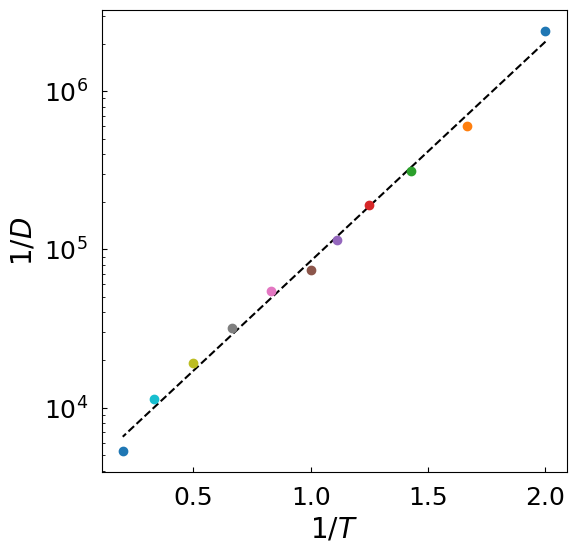

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
for iT, T_i in enumerate(T_list):
    ax.plot(1/T_i,1/D_list[iT],"o")
    
y = np.log(1/np.array(D_list))[:]
x = np.vstack([1/np.array(T_list),np.ones_like(T_list)]).T    
A, B = np.linalg.lstsq(x, y, rcond=None)[0]

ax.plot(1/np.array(T_list), np.exp(A*1/np.array(T_list)+B),"--k",zorder=-10)
print(f"A: {A}")
    
ax.set_xlabel(r"$1/T$", fontsize=20)
ax.set_ylabel(r"$1/D$", fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)
# ax.set_xscale('log')
ax.set_yscale('log')

T_C: 0.391374203608193, A: 3.3482885807986365e-05, B: 1.970482712869709


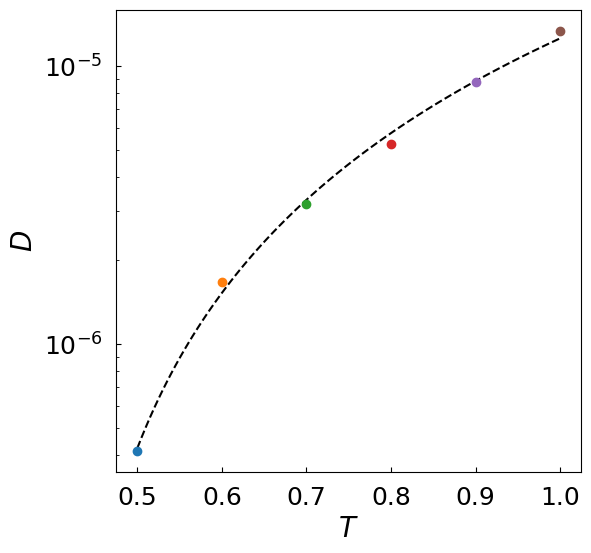

In [27]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
    
# y = np.log(1/np.array(D_list))[:]
# x = np.vstack([1/np.array(T),np.ones_like(T)]).T    
# A, B = np.linalg.lstsq(x, y, rcond=None)[0]

# Define the function D=a*(T-Tc)^b
def func(T, Tc, a, b):
    return np.log(a*(T - Tc) ** b)

# Convert T and D_list to numpy arrays for curve fitting
T_np = np.array(T_list)[:-5]
logD_list_np = np.log(np.array(D_list))[:-5]

# Use curve_fit to fit the data to the function
popt, pcov = curve_fit(func, T_np, logD_list_np, p0=[0.35, 1e-4, 1.5], bounds=([0.3,1e-5,1], [0.6,1e-2,2]))

# Plot the fitted curve
T_fitted = np.linspace(min(T_np), max(T_np), 100)
D_fitted = np.exp(func(T_fitted, *popt))
# ax.text(1.5,2e-6,r"$D=a(T-T_c)^b$",fontsize=16)
# ax.text(1.5,12e-7,r"$a={:0.2e}, b={:0.2f}$".format(popt[1],popt[2]),fontsize=16)
# ax.text(1.5,7.2e-7,r"$T_c={:0.2f}$".format(popt[0]),fontsize=16)
# print(f"A: {A}")
fp_DT = [popt, pcov]

ax.plot(T_fitted-popt[0]*0, D_fitted, '--k', zorder=-10)

for iT, T_i in enumerate(T_list[:-5]):
    ax.plot(T_i-popt[0]*0,D_list[iT],"o")

# ax.plot(1/np.array(T), np.exp(A*1/np.array(T)+B),"--k",zorder=-10)
print(f"T_C: {popt[0]}, A: {popt[1]}, B: {popt[2]}")
    
ax.set_xlabel(r"$T$", fontsize=20)
ax.set_ylabel(r"$D$", fontsize=20)
# ax.set_xlim([0.1,5])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)
# ax.set_xscale('log')
ax.set_yscale('log')

/tmp/ipykernel_356443/3374150153.py:10: RuntimeWarning: invalid value encountered in power
  return np.log(a*(T - Tc) ** -b)


T_C: 0.47973877660688846, A: 124601.57983442668, B: 1.5364256367289684


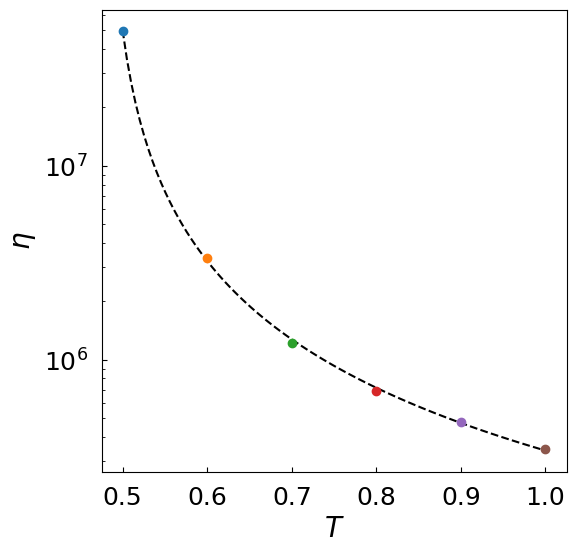

In [28]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
    
# y = np.log(1/np.array(D_list))[:]
# x = np.vstack([1/np.array(T),np.ones_like(T)]).T    
# A, B = np.linalg.lstsq(x, y, rcond=None)[0]

# Define the function D=a*(T-Tc)^b
def func(T, Tc, a, b):
    return np.log(a*(T - Tc) ** -b)

# # Convert T and D_list to numpy arrays for curve fitting
T_np = np.array(T_list)[:-5]
logeta_list_np = np.log(np.array(tau_M/v))[:-5]

# Use curve_fit to fit the data to the function
popt, pcov = curve_fit(func, T_np, logeta_list_np, p0=[0.45, 1e4, 1], bounds=([0.3,1e1,0.5], [1.0,1e6,2]))

# Plot the fitted curve
T_fitted = np.linspace(min(T_np), max(T_np), 100)
eta_fitted = np.exp(func(T_fitted, *popt))
# ax.text(1.5,2e-6,r"$D=a(T-T_c)^b$",fontsize=16)
# ax.text(1.5,12e-7,r"$a={:0.2e}, b={:0.2f}$".format(popt[1],popt[2]),fontsize=16)
# ax.text(1.5,7.2e-7,r"$T_c={:0.2f}$".format(popt[0]),fontsize=16)
# print(f"A: {A}")
fp_etaT = [popt, pcov]

ax.plot(T_fitted, eta_fitted, '--k', zorder=-10)

for iT, T_i in enumerate(T_list[:-5]):
    ax.plot(T_i,tau_M[iT]/v[iT],"o")

# ax.plot(1/np.array(T), np.exp(A*1/np.array(T)+B),"--k",zorder=-10)
print(f"T_C: {popt[0]}, A: {popt[1]}, B: {popt[2]}")
    
ax.set_xlabel(r"$T$", fontsize=20)
ax.set_ylabel(r"$\eta$", fontsize=20)
# ax.set_xlim([0.1,5])
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)
# ax.set_xscale('log')
ax.set_yscale('log')

A: -0.6835759078250083
A: -1.8311379947221071


Text(0, 0.5, '$ln(\\eta)$')

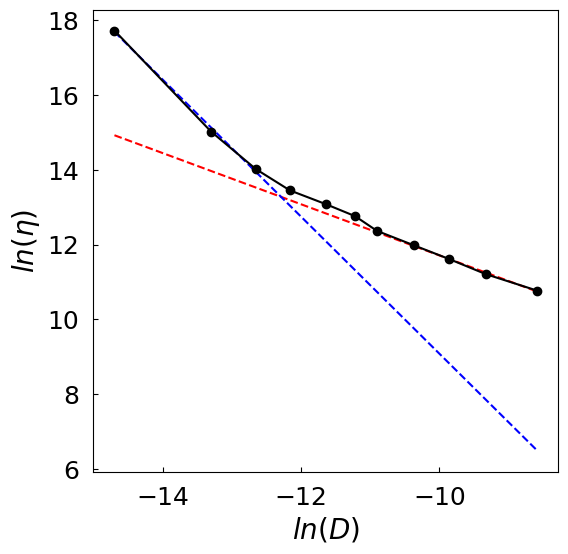

In [13]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

logeta_list_np = np.log(np.array(tau_M/v))[:]
logD_list_np = np.log(np.array(D_list))[:]

y = logeta_list_np[7:]
x = np.vstack([logD_list_np[7:],np.ones_like(logD_list_np[7:])]).T    
A, B = np.linalg.lstsq(x, y, rcond=None)[0]

ax.plot(logD_list_np, (A*logD_list_np+B),"--r",zorder=-10)
print(f"A: {A}")

y = logeta_list_np[:3]
x = np.vstack([logD_list_np[:3],np.ones_like(logD_list_np[:3])]).T    
A, B = np.linalg.lstsq(x, y, rcond=None)[0]
fp_Deta = [popt, pcov]

ax.plot(logD_list_np, (A*logD_list_np+B),"--b",zorder=-10)
print(f"A: {A}")

ax.plot(logD_list_np, logeta_list_np, '-ok', zorder=-10)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)
ax.set_xlabel(r"$ln(D)$", fontsize=20)
ax.set_ylabel(r"$ln(\eta)$", fontsize=20)

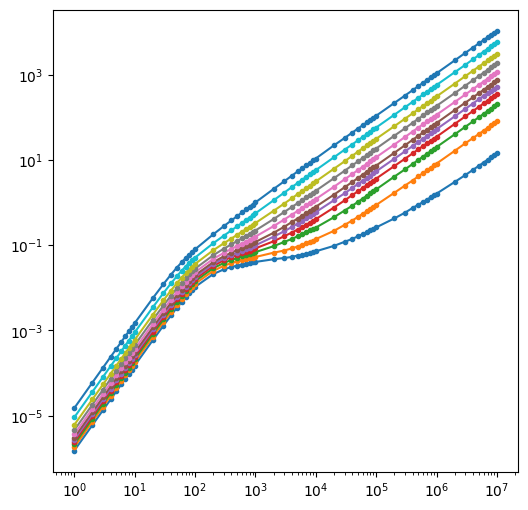

In [14]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.plot(t,MSD,".-")
ax.set_xscale('log')
ax.set_yscale('log')

In [26]:
from tabulate import tabulate

# Assuming T, D, eta are your numpy arrays
table = np.column_stack((T_list, D_list, eta_list))
latex_table = tabulate(table, tablefmt="latex", floatfmt=[".1f",".4e",".4e"], headers=["T", "D", r"$eta$"])
print(latex_table)

\begin{tabular}{rrr}
\hline
   T &          D &      \$eta\$ \\
\hline
 0.5 & 4.1351e-07 & 4.9699e+07 \\
 0.6 & 1.6699e-06 & 3.3432e+06 \\
 0.7 & 3.1907e-06 & 1.2265e+06 \\
 0.8 & 5.2250e-06 & 6.9288e+05 \\
 0.9 & 8.7792e-06 & 4.7981e+05 \\
 1.0 & 1.3430e-05 & 3.4750e+05 \\
 1.2 & 1.8424e-05 & 2.3454e+05 \\
 1.5 & 3.1257e-05 & 1.6005e+05 \\
 2.0 & 5.2142e-05 & 1.1076e+05 \\
 3.0 & 8.8836e-05 & 7.3808e+04 \\
 5.0 & 1.8696e-04 & 4.7451e+04 \\
\hline
\end{tabular}


In [18]:
D_list

array([4.13509723e-07, 1.66994495e-06, 3.19068572e-06, 5.22497114e-06,
       8.77915004e-06, 1.34297030e-05, 1.84243199e-05, 3.12570697e-05,
       5.21416952e-05, 8.88363914e-05, 1.86956293e-04])